In [2]:
from files.utils.utility_functions import *
from files.pif.pif import *
from files.utils.dataset_3d_helper import *

In [55]:
ds, gt = create_sphere()
plot3d(ds, gt=gt)

In [56]:
from sklearn.ensemble import IsolationForest as iFor

ifor = iFor().fit(ds)
scores_ifor = -ifor.score_samples(ds)
ifor_auc, *_ = make_roc(gt, scores_ifor, show=False, to_plot=False);
print("iFor AUC: ", ifor_auc)

iFor AUC:  0.600976


In [61]:
params = {
    "root_path": "/home/catonz/Neural-PreferenceIsolation",

    "mss": 5,
    "num_models": 1000,
    "training_epochs": 200,

    "AE_structure": {
        "neurons": [3, 12, 6, 2, 6, 12, 3],
        "activation": torch.tanh
    },

    "SOM_structure": {
        "n_rows": 5,
        "n_cols": 5,
        "sigma": "default"
    }
}


pif = PreferenceIsolationForest(data=ds, model_name=AE)
scores = pif.anomaly_detection(in_th=0.1, params=params)

pif_auc, *_ = make_roc(gt, scores, show=False, to_plot=False);
print("PIF AUC: ", pif_auc)

Anomaly Detection
--------------------------------------------------
Building RanSac models
Iteration 1000/1000: [==============================] (100%) ETA: 0:03:41.957039
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Building Voronoi Forest
--------------------------------------------------
Done
PIF AUC:  0.545018


In [64]:
preds = pif.models[800].predict(ds)
plot3d(preds)

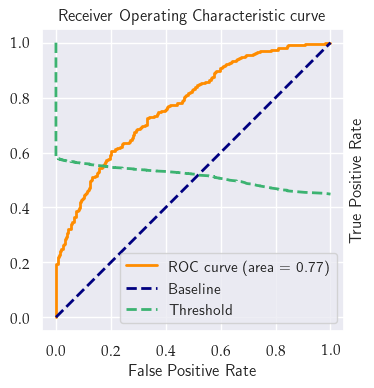

In [59]:
pif_auc, tpr, fpr, thr, *_ = make_roc(gt, scores);

In [34]:
thr[np.where(tpr >= 0.8)]

array([0.53115495, 0.53070983, 0.52156008, 0.52042494, 0.49473827])

In [39]:
tpr[np.where(tpr>=0.1)][0]

0.1

In [53]:
ss = np.ones(shape=scores.shape)
ss[scores > thr[np.where(tpr>=0.7)][0]] = 0
print("Normal: ", len(np.where(ss==1)[0]))
print("Anomal: ", len(np.where(ss==0)[0]))
plot3d(ds, gt=ss)

Normal:  163
Anomal:  837


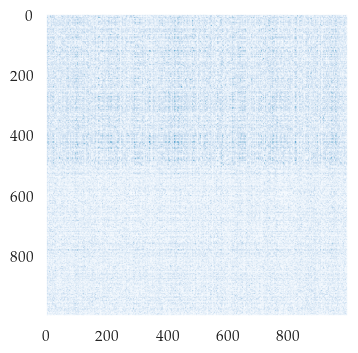

In [60]:
plt.figure(dpi=100)
plt.grid()
plt.imshow(pif.preference_matrix, cmap="Blues")

In [6]:
params = {
    "root_path": "/home/catonz/Neural-PreferenceIsolation",

    "mss": 5,
    "num_models": 1000,
    "training_epochs": 200,

    "AE_structure": {
        "neurons": [3, 9, 2, 9, 3],
        "activation": torch.tanh
    },

    "SOM_structure": {
        "n_rows": 5,
        "n_cols": 5,
        "sigma": "default"
    }
}


pif_som = PreferenceIsolationForest(data=ds, model_name=SOM)
scores_som = pif_som.anomaly_detection(in_th=0.1, params=params)

pif_som_auc, *_ = make_roc(gt, scores_som, show=False, to_plot=False);
print("PIF_som AUC: ", pif_som_auc)

Anomaly Detection
--------------------------------------------------
Building RanSac models
Iteration 1000/1000: [==============================] (100%) ETA: 0:00:09.965659
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Building Voronoi Forest
--------------------------------------------------
Done
PIF AUC:  0.696836


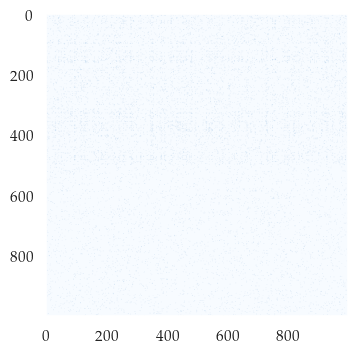

In [7]:
plt.figure(dpi=100)
plt.grid()
plt.imshow(pif_som.preference_matrix, cmap="Blues")


In [8]:
from files.classes.neural_models import *

nen = NeuralNetwork(neurons=[3, 6, 2, 6, 3])
nen.fit(data=ds, epochs=500, bs=64, print_training=True);

Epoch 500/500: [==============================] (100%) ETA: 0:00:10.292987 Mean Loss: 0.22511


In [9]:
nen_auc, *_ = make_roc(gt, nen.get_residuals(ds), show=False, to_plot=False);
print("NEN AUC: ", nen_auc)

NEN AUC:  0.6892400000000001


In [10]:
plot3d(nen.predict(ds))

In [11]:
plot3d(ds=ds, gt=gt)

In [5]:
# plane, gt_plane = create_plane()
# paraboloid, gt_paraboloid = create_paraboloide()
# sphere, gt_sphere = create_sphere()
# 
# path = r"/home/catonz/Neural-PreferenceIsolation/datasets/3d"
# 
# write_np_array(path=path, name="plane.csv", x=plane)
# write_np_array(path=path, name="plane_gt.csv", x=gt_plane, dimensions=1)
# write_np_array(path=path, name="paraboloid.csv", x=paraboloid)
# write_np_array(path=path, name="paraboloid_gt.csv", x=gt_paraboloid, dimensions=1)
# write_np_array(path=path, name="sphere.csv", x=sphere)
# write_np_array(path=path, name="sphere_gt.csv", x=gt_sphere, dimensions=1)